## Intro

**Scope of use:**
1. T-test.  
X - **one** categorical feature with only **two** categories.  
y - numerical variable.  
**Objective:** is there a statistically siginificant difference in the mean value of 'y' between two groups of 'X'?  
**Statistic:** t-statistic  
**H0:** means in two groups are the same (the difference is not statistically significant).  
**H1:** means in two groups are different.

2. One-way ANOVA.  
X - **one** categorical feature with **three or more** categories.  
y - numerical variable.  
**Objective:** is there a statistically siginificant difference in the mean value of 'y' between any of the 'X' groups (at leas between one group pair)?  
**Statistic:** F-statistic - indicates the ratio of the variance between the groups to the variance within the groups.  
**H0:** means in all the groups are the same (the difference is not statistically significant).  
**H1:** there is at least one pair of groups with different means.  

3. Two-way ANOVA.  
X - **two** categorical features with **two or more** categories.  
y - numerical variable.  
**Objective:** is there a statistically siginificant difference in the mean value of 'y' between any of the 'X' groups, including **interaction between groups**?  
**Statistic:** F-statistic and p-value for each factor A and B (X features) and for interaction A with B.  
**H0 for each factor and interaction:** factor (A / B / A-VS-B) does not have any effect on 'y'. Simply the same as H0 in one-way ANOVA: means in all the groups are the same, but just for one factor.  
**H1 for each factor and interaction:** factor (A / B / A-VS-B) has a significant effect on 'y'. Simply the same as H1 in one-way ANOVA: there is at least one pair of groups with different means, but just for one factor.  

4. Regression analysis.
X - any number of any type variables
y - numerical variable
**Objective:** do features in 'X' have any effect on 'y' (with or without interaction effects)? In other words: do regression coefficients significantly differ from 0?
**Result:**  
- coefficients for each feature
- coefficients for interactions by choice
- standard error for each coefficient
- T-statistic and p-value for each coefficient
- F-statistic and p-value for the overall model

**Assumptions for all tests:**
- residuals are normally distribyted
- observations are independant and identically distributed (IID)
- homoscedasticity of variance of residuals

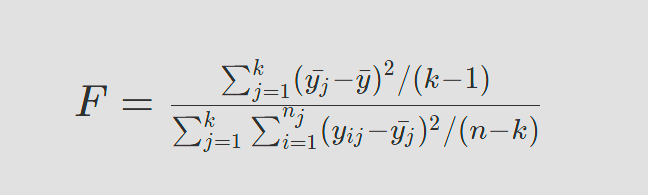

## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.special import factorial
import statsmodels.api as sm
from statsmodels.formula.api import ols

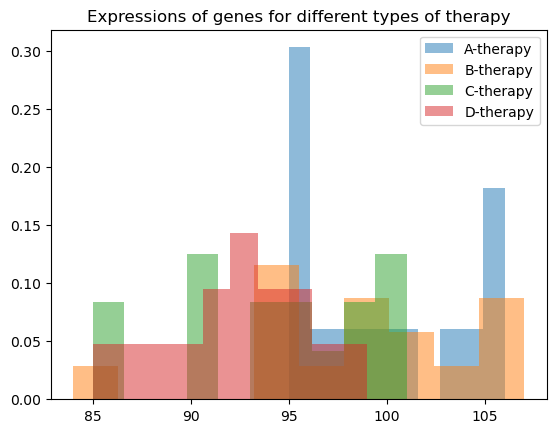

,left border,mean,right border
A-treatment,97.426490,99.733333,102.040176
B-treatment,95.535841,98.800000,102.064159
C-treatment,91.523990,94.400000,97.276010
D-treatment,90.264799,92.333333,94.401867


In [4]:
therapy = pd.read_csv('datasets/genetherapy.csv')
a_therapy = therapy[therapy['Therapy'] == 'A']['expr']
b_therapy = therapy[therapy['Therapy'] == 'B']['expr']
c_therapy = therapy[therapy['Therapy'] == 'C']['expr']
d_therapy = therapy[therapy['Therapy'] == 'D']['expr']

plt.hist(a_therapy, label='A-therapy', alpha=0.5, density=True)
plt.hist(b_therapy, label='B-therapy', alpha=0.5, density=True)
plt.hist(c_therapy, label='C-therapy', alpha=0.5, density=True)
plt.hist(d_therapy, label='D-therapy', alpha=0.5, density=True)

plt.title('Expressions of genes for different types of therapy')
plt.legend()
plt.show()

def get_mean_confidence_interval(arr, alpha=0.95):
    n = len(arr)
    arr_mean = arr.mean()
    arr_std = arr.std()
    mean_std = arr_std / np.sqrt(n)
    
    left_percent = (1 - alpha) / 2
    right_percent = alpha + (1 - alpha) / 2
    left_crit = scipy.stats.t(n-1).ppf(left_percent)
    right_crit = scipy.stats.t(n-1).ppf(right_percent)

    left_border = arr_mean + left_crit * mean_std
    right_border = arr_mean + right_crit * mean_std
    return (left_border, arr_mean, right_border)
    
trust_intervals = pd.DataFrame(
    columns=['left border', 'mean', 'right border'],
    data=[
        get_mean_confidence_interval(a_therapy, alpha=0.95),
        get_mean_confidence_interval(b_therapy, alpha=0.95),
        get_mean_confidence_interval(c_therapy, alpha=0.95),
        get_mean_confidence_interval(d_therapy, alpha=0.95)
    ],
    index=['A-treatment','B-treatment','C-treatment','D-treatment']
)
trust_intervals

## Tests for normality and following other distributions

A **QQ plot**, short for quantile-quantile plot, is a graphical tool used to compare the distribution of two datasets, typically to check if they follow the same distribution. Here's how you interpret it:

1. Underlying Idea: The QQ plot compares the quantiles of the two datasets. If the datasets come from the same distribution, the points on the QQ plot should roughly form a straight line.

2. Interpreting the Linearity: If the points form a straight line, it suggests that the two datasets have similar distributions. Departures from this linearity indicate differences in distribution.

3. Slope of the Line: The slope of the line provides information about differences in scale between the two distributions. A steeper slope suggests that one dataset has a wider range of values than the other.

4. Points Deviating from the Line: Points that deviate from the straight line indicate areas where the distributions differ. If points consistently deviate in one direction (e.g., all above or below the line), it suggests a systematic difference in one dataset compared to the other.

5. Tails of the Distribution: Focus on the tails of the distribution, as they can provide insights into differences in extreme values.

6. Normal QQ Plot: When comparing a dataset to a normal distribution, a QQ plot can help identify deviations from normality. If the points deviate significantly from the straight line in the tails, it suggests non-normality.

Overall, QQ plots are useful for visually assessing the similarity between two datasets or for checking the normality assumption in statistical analyses.

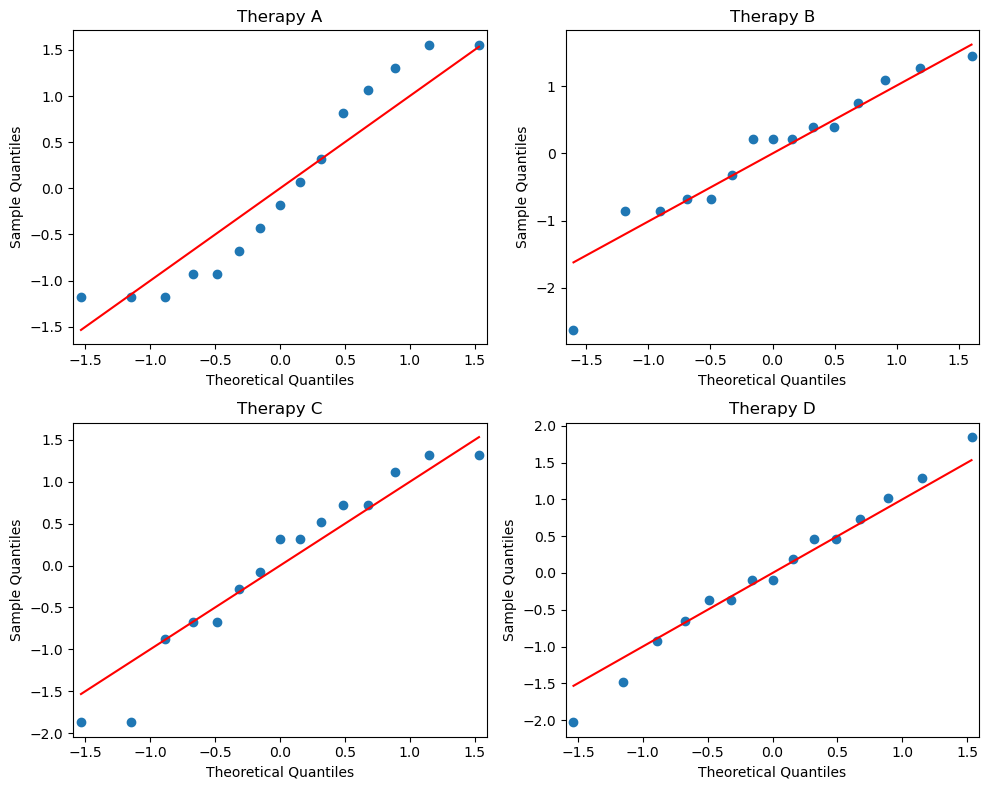

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sm.qqplot(a_therapy, ss.t, fit=True, line="s", ax=axes[0, 0])
axes[0, 0].set_title('Therapy A')

sm.qqplot(b_therapy, ss.t, fit=True, line="s", ax=axes[0, 1])
axes[0, 1].set_title('Therapy B')

sm.qqplot(c_therapy, ss.t, fit=True, line="s", ax=axes[1, 0])
axes[1, 0].set_title('Therapy C')

sm.qqplot(d_therapy, ss.t, fit=True, line="s", ax=axes[1, 1])
axes[1, 1].set_title('Therapy D')

plt.tight_layout()

plt.show()

**Shapiro-Wilk Test:**

H0: The data are normally distributed.

H1: The data are not normally distributed.

The Shapiro-Wilk test is a widely used test for normality. It tests the null hypothesis that the data are normally distributed. Shapiro-Wilk test is suitable for small to moderate sample sizes (up to a few thousand observations).

**Kolmogorov-Smirnov Test:**

H0: The data follow the specified distribution.

H1: The data do not follow the specified distribution.

The Kolmogorov-Smirnov (KS) test is a non-parametric test that compares the cumulative distribution function (CDF) of the data to a specified distribution. KS test can be used to test normality or any other distribution.

**Anderson-Darling Test:**

H0: The data are normally distributed.

H1: The data are not normally distributed.

The Anderson-Darling test is another test for normality that is based on the empirical distribution function. It provides a weighted sum of squared differences between observed and expected values. Anderson-Darling test is considered more powerful than the Shapiro-Wilk test for smaller sample sizes.

**Jarque-Bera Test:**

H0: The data are normally distributed.

H1: The data are not normally distributed.

The Jarque-Bera test is a goodness-of-fit test that checks whether sample data have the skewness and kurtosis matching a normal distribution. Jarque-Bera test is particularly sensitive to departures from normality in terms of skewness and kurtosis.

**Lilliefors Test:**

H0: The data are normally distributed.

H1: The data are not normally distributed.

The Lilliefors test is a modification of the Kolmogorov-Smirnov test that is specifically designed for testing normality. Lilliefors test is suitable for small to moderate sample sizes.

**Chi-Square Test:**

H0: The data follow the specified distribution.

H1: The data do not follow the specified distribution.

The Chi-Square goodness-of-fit test can be used to test whether sample data follow a specified distribution (e.g., normal distribution). Chi-Square test is commonly used for categorical data but can also be adapted for continuous data by grouping into intervals.

## Tests for variance equality

$H0: Var_1 = Var_2 = ... = Var_n$  
$H0: Var_1 \neq Var_2 \neq ... \neq Var_n$

**F-test (Bartlett's test):**

The F-test, also known as Bartlett's test, is used to compare the variances of two or more samples. It assumes that the samples are normally distributed.

**Levene's test:**

Levene's test is another test for the equality of variances, similar to Bartlett's test. It is less sensitive to departures from normality than Bartlett's test.

**Brown-Forsythe test:**

The Brown-Forsythe test is a modified version of Levene's test that uses the median instead of the mean to compute deviations from the group means. It is less sensitive to outliers.

**Fligner-Killeen test:**

The Fligner-Killeen test is a non-parametric test for the equality of variances. It does not assume normality of the data. The test is based on ranks and is robust to departures from normality.

**Bartlett's test for homogeneity of variances:**

Bartlett's test is an extension of the F-test for comparing the variances of two or more samples. It assumes that the samples are normally distributed. Bartlett's test is commonly used when comparing variances across different groups or treatments in an ANOVA setting.

In [11]:
ss.levene(a_therapy, b_therapy, c_therapy, d_therapy)

LeveneResult(statistic=0.6477908627745761, pvalue=0.5876330665111003)

Based on the Levene's test's results we can use t-tests for datasets with equal variances.

## T-test

Limitations for One-Sample T-test:  
* $X_i \sim N(\mu, \sigma^2)$ and $\sigma$ is unknown
* or
* $n \geq 100$ and $\sigma$ is unknown

In [15]:
def t_test_one_sample(arr, h_value):
    n = len(arr)
    STUDENT = ss.t(n - 1)
    arr_mean = arr.mean()
    arr_std = arr.std()
    mean_std = arr_std / np.sqrt(n)
    t_stat = (abs(arr_mean - h_value)) / mean_std
    print(f'T-statistic: {t_stat}')
    print(f'Two-sides P-value: {1 - STUDENT.cdf(t_stat)}')
    print()
    return

t_test_one_sample(a_therapy, 100)

T-statistic: 0.24793327950623623
Two-sides P-value: 0.4038927755370303



In [16]:
def t_test_two_samples_equal_var(arr1, arr2):
    n1 = len(arr1)
    n2 = len(arr2)
    mean1 = arr1.mean()
    std1 = arr1.std()
    mean2 = arr2.mean()
    std2 = arr2.std()
    total_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))
    t_stat = abs(mean1 - mean2) / np.sqrt(total_std**2 / n1 + total_std**2 / n2)
    
    STUDENT = ss.t(n1 + n2 - 2)
    p_value = 1 - STUDENT.cdf(t_stat)

    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')
    return p_value

def t_test_two_samples_unequal_var(arr1, arr2):
    n1 = len(arr1)
    n2 = len(arr2)
    mean1 = arr1.mean()
    std1 = arr1.std()
    mean2 = arr2.mean()
    std2 = arr2.std()
    t_stat = abs(mean1 - mean2) / np.sqrt(std1**2 / n1 + std2**2 / n2)
    
    STUDENT = ss.t(min(n1, n2) - 1)
    p_value = 1 - STUDENT.cdf(t_stat)

    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')
    return p_value

In [17]:
alpha = 0.05
n_groups = 4
n_tests = factorial(n_groups) / (factorial(n_groups - 2) * factorial(2))
alpha_bonferroni = alpha / n_tests

print(f'For {n_groups} groups we have {n_tests} tests')
print(f'Alpha after bonferroni correction: {alpha_bonferroni}')
print()

couples = [
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'D'),
    ('B', 'C'),
    ('B', 'D'),
    ('C', 'D')
]

diff_t_test = []
diff_tukey = []
for couple in couples:
    print(f'{couple[0]} VS {couple[1]}')
    a_data = therapy[therapy['Therapy'] == couple[0]]['expr']
    b_data = therapy[therapy['Therapy'] == couple[1]]['expr']
    p_value = t_test_two_samples_equal_var(a_data, b_data)
    if p_value < alpha_bonferroni:
        print('Reject H0, difference found')
        diff_t_test.append(f'{couple[0]} VS {couple[1]}')
    else:
        print("Can't reject H0, difference NOT found")
    print('--------------------------------------------------')
    print('--------------------------------------------------')

print(f'Difference was found in T-test: {diff_t_test}')
print('T-confidence intervals:')
display(trust_intervals)

tukey = ss.tukey_hsd(a_therapy, b_therapy, c_therapy, d_therapy)
print(tukey)

For 4 groups we have 6.0 tests
Alpha after bonferroni correction: 0.008333333333333333

A VS B
T-statistic: 0.5008219934310062
P-value: 0.3102053721134188
Can't reject H0, difference NOT found
--------------------------------------------------
--------------------------------------------------
A VS C
T-statistic: 3.102600209805033
P-value: 0.0021756605754900127
Reject H0, difference found
--------------------------------------------------
--------------------------------------------------
A VS D
T-statistic: 5.122384170709326
P-value: 9.923560537195009e-06
Reject H0, difference found
--------------------------------------------------
--------------------------------------------------
B VS C
T-statistic: 2.169229253803188
P-value: 0.019354735922582522
Can't reject H0, difference NOT found
--------------------------------------------------
--------------------------------------------------
B VS D
T-statistic: 3.5890776787360803
P-value: 0.0006247529897165371
Reject H0, difference found
-

,left border,mean,right border
A-treatment,97.426490,99.733333,102.040176
B-treatment,95.535841,98.800000,102.064159
C-treatment,91.523990,94.400000,97.276010
D-treatment,90.264799,92.333333,94.401867


Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.933     0.951    -3.729     5.596
 (0 - 2)      5.333     0.019     0.671     9.996
 (0 - 3)      7.400     0.001     2.737    12.063
 (1 - 0)     -0.933     0.951    -5.596     3.729
 (1 - 2)      4.400     0.071    -0.263     9.063
 (1 - 3)      6.467     0.003     1.804    11.129
 (2 - 0)     -5.333     0.019    -9.996    -0.671
 (2 - 1)     -4.400     0.071    -9.063     0.263
 (2 - 3)      2.067     0.646    -2.596     6.729
 (3 - 0)     -7.400     0.001   -12.063    -2.737
 (3 - 1)     -6.467     0.003   -11.129    -1.804
 (3 - 2)     -2.067     0.646    -6.729     2.596



Tukey's test is less concervative, but the result is the same: the difference was found in A-C, A-D and B-D groups

## One-way ANOVA

2 requirements for ANOVA analysis:
1. Normal distribution in each group
2. Homogeneity of variance
With the number of observations > 50 ANOVA is robust to violation of these requirements
For normality-test: QQ-plot
For homogeneity of Variance: Levene's test

In [21]:
# Function to manually perform ANOVA
def one_way_anova(list_of_arr):
    n_groups = len(list_of_arr)
    d1 = n_groups - 1
    means = np.array([])
    elements_in_groups = np.array([])
    arr_all = np.array([])
    ssw = 0
    for arr in list_of_arr:
        arr_all = np.concatenate([arr_all, arr])
        arr_mean = arr.mean()
        means = np.concatenate([means, np.array([arr_mean])])
        elements_in_groups = np.concatenate([elements_in_groups, np.array([len(arr)])])
        ssw_i = sum((arr - arr_mean)**2)
        ssw += ssw_i
    total_elements = len(arr_all)
    d2 = total_elements - n_groups
    total_mean = arr_all.mean()
    sst = sum((arr_all - total_mean)**2)
    ssb = sum(elements_in_groups * (means - total_mean)**2)
    
    f_stat = (ssb / d1) / (ssw / d2)
    FISHER_SNEDECOR = ss.f(d1, d2)
    p_value = 1 - FISHER_SNEDECOR.cdf(f_stat)
    
    '''print(f'sst {sst}')
    print(f'ssw {ssw}')
    print(f'ssb {ssb}')
    print(f'total_mean {total_mean}')
    print(f'means {means}')'''
    print(f'f_stat {f_stat}')
    print(f'p_value {p_value}')
    return

In [22]:
print('Results with hand-made function:')
one_way_anova([
    a_therapy,
    b_therapy,
    c_therapy,
    d_therapy
])
print()

f_stat, p_value = ss.f_oneway(a_therapy,b_therapy,c_therapy,d_therapy)
print('Result with scipy:')
print(f'f_stat {f_stat}')
print(f'p-value {p_value}')
print()

print('Results with statsmodels:')
model = ols('expr ~ C(Therapy)', data=therapy).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
display(anova_table)

display(therapy.groupby('Therapy').agg(
    N=('expr', 'count'),
    Mean=('expr', 'mean'),
    STD=('expr', 'std')
))

Results with hand-made function:
f_stat 8.037302481143987
p_value 0.00015249722895227524

Result with scipy:
f_stat 8.03730248114399
p-value 0.00015249722895229536

Results with statsmodels:


,df,sum_sq,mean_sq,F,PR(>F)
C(Therapy),3.0,560.716667,186.905556,8.037302,0.000152
Residual,56.0,1302.266667,23.254762,NaN,NaN


,N,Mean,STD
Therapy,,,
A,15,99.733333,4.165619
B,15,98.800000,5.894307
C,15,94.400000,5.193402
D,15,92.333333,3.735289


df_ssb = n_groups - 1 = 3  
sum_sq_therapy = SSB = 560.7  
mean_sq_ssb = SSB / df_ssb = 186.9  

df_residuals = n_total - n_groups = 56  
sum_sq_residuals = SSW = 1302.3  
mean_sq_ssw = SSW / df_residuals  

## Two-way ANOVA

In [25]:
data = pd.read_csv('datasets/atherosclerosis.csv')
data.head()

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1


In [26]:
model = ols('expr ~ C(age) + C(dose) + C(age):C(dose)',
            data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq    df         F    PR(>F)
C(age)           197.452754   1.0  7.449841  0.008313
C(dose)           16.912241   1.0  0.638094  0.427552
C(age):C(dose)     0.927077   1.0  0.034978  0.852272
Residual        1590.257424  60.0       NaN       NaN


## Regression analysis

Requirements for using Pearson's correlation coefficient:
1. Linearity and monoton... of the relationship of two variables
2. Preferably - Normal distribution of both variables. Outliers, asymmetry will significantly affect the result  

Non-parametric analogs:
1. Spearman's correlation coefficient
2. Tau-Kendall's correlation coefficient

Requirements for Regression Analysis:
1. Linear relationship between two variables. Scatter plot to check
2. Normal distribution of residuals
3. Homogeneity of residuals along the whole 'X' scale of data  
For residuals: Scatter plot, Histogram, QQ-plot

H0 for regression analysis: b1 == 0  
H1: b1 != 0

In [29]:
data= pd.read_csv('datasets/states.csv')
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


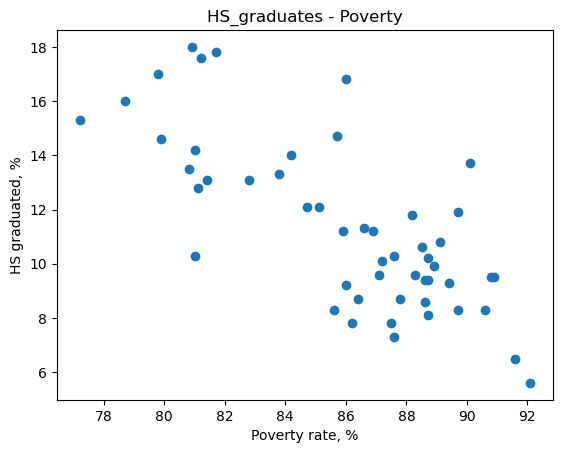

In [30]:
x = data['hs_grad']
x_mean = x.mean()
std_x = x.std()
y = data['poverty']
std_y = y.std()
y_mean = y.mean()
r_xy = np.corrcoef(x, y)
b1 = std_x / std_y * r_xy[0][1]
b0 = y_mean - b1 * x_mean

plt.scatter(x, y)
plt.title('HS_graduates - Poverty')
plt.xlabel('Poverty rate, %')
plt.ylabel('HS graduated, %')
plt.show()

In [31]:
X = data[['metro_res', 'white', 'hs_grad', 'female_house']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Wed, 15 May 2024   Prob (F-statistic):           8.88e-10
Time:                        09:17:21   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           66.4765     12.590      5.280   

## Playing with Spaceship Titanic dataset

In [33]:
data = pd.read_csv('datasets/spaceship-titanic/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [35]:
print(data['CryoSleep'].value_counts(dropna=False))
print()
print(data['VIP'].value_counts(dropna=False))
print()
print(data['Transported'].value_counts(dropna=False))

data['CryoSleep'] = np.where(data['CryoSleep'] == False, 0, 1)
data['VIP'] = np.where(data['VIP'] == False, 0, 1)
data['Transported'] = np.where(data['Transported'] == False, 0, 1)

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64

Transported
True     4378
False    4315
Name: count, dtype: int64


In [36]:
print(f'Number of NaN rows: {len(data) - len(data.dropna())} out of total: {len(data)}')
(data.isna().mean().sort_values(ascending=False)*100).to_frame('% of NaN values').style.background_gradient()

data = data.dropna()

Number of NaN rows: 1750 out of total: 8693


For now, let's just drop all NaN values. Might improve the solution in the future

In [38]:
data['HomePlanet'].value_counts()

HomePlanet
Earth     3748
Europa    1758
Mars      1437
Name: count, dtype: int64

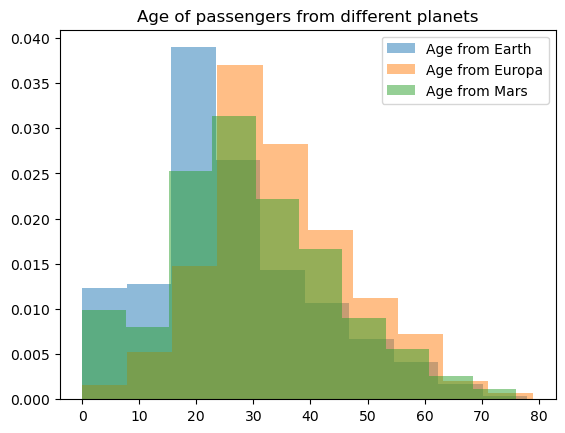

Mean age from Earth: 26.03
Mean age from Europa: 34.50
Mean age from Mars: 29.39


In [39]:
earth_age = data[data['HomePlanet'] == 'Earth']['Age']
europa_age = data[data['HomePlanet'] == 'Europa']['Age']
mars_age = data[data['HomePlanet'] == 'Mars']['Age']

plt.hist(earth_age, label='Age from Earth', alpha=0.5, density=True)
plt.hist(europa_age, label='Age from Europa', alpha=0.5, density=True)
plt.hist(mars_age, label='Age from Mars', alpha=0.5, density=True)

plt.title('Age of passengers from different planets')
plt.legend()
plt.show()

print(f'Mean age from Earth: {earth_age.mean():.2f}')
print(f'Mean age from Europa: {europa_age.mean():.2f}')
print(f'Mean age from Mars: {mars_age.mean():.2f}')